# Projet 1 : Iris Classification
## Motivations personnelles 
Bienvenue sur mon premier projet ML et DL.  
Il s'agira à travers ce fichier, d'utiliser, pour la première fois, des **outils essentiels** pour la compréhension du ML.  
Constituant la première pierre de mon auto-formation, je n'ai aucune idée de la pertinence de ce projet.  
Ce que je sais, en revanche, c'est qu'il faut bien **commencer quelque part**.

Je précise que mon parcours Licence **"Mathématiques et Applications"** m'a déja formé sur des méthodes statistiques, dont :
* Matplotlib
* Pandas
* Numpy
* seaborn

## Objectifs  
**Prédire** l'espèce des fleurs Iris à partir de leurs caractéristiques.

## I. Importation des modules nécessaires

In [10]:
import pandas as pd
import numpy as np

> pour les données

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

> pour la visualisation

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

> Pour le machine learning

## II. Formalisation des données

In [128]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

> ici, on a chargé la Dataset iris pour une première prise en main de ses outils

## III. visualisation des données

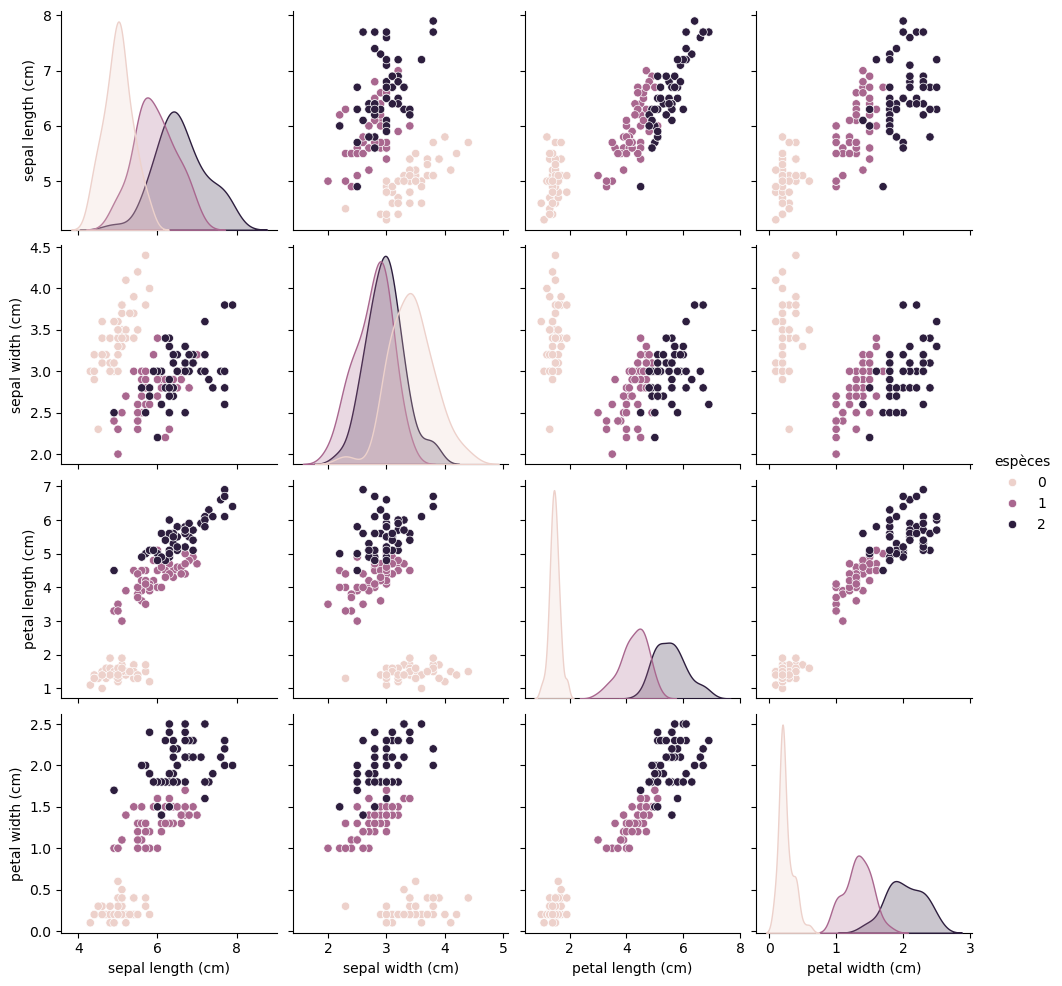

In [130]:
df = X.copy() #pour ne pas écraser le tableau initial
df['espèces'] = y #on concatène les caractéristiques avec les espèces
sns.pairplot(df, hue='espèces') #on crée le graphique des pairs de caractéristiques
plt.show() #on affiche

> - Le but de ce graphique est de visualiser les individus en les colorisant en fonction de l'espèce pour un maximum de visibilité  
> - On obtient ainsi un aperçu très pratique des relations potentielles entre les caractéristiques  
> - Ceci peut nous aider par la suite à détecter les confusion du modèle

## IV. Séparation des données  
ici on sépare les données en "à entrainer" et en "à tester"

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> de cette manière on obtient des variables séparées pour chaque type de données (train, test). On controle la taille du sample test.

## V. Entrainement  
On utilise ici la fonction RandomForestClassifier(), un modèle présent dans sklearn

In [157]:
# Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train) #entraînement

# Prédictions
y_pred = clf.predict(X_test)

## VI. Visualisation des résultat et évaluation du modèle

Accuracy : 100.00%


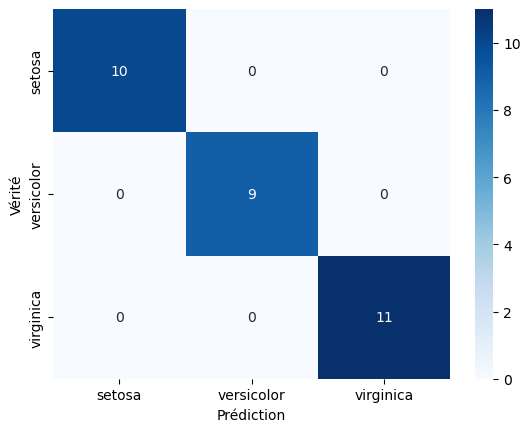

In [160]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy : {acc*100:.2f}%")

# Heatmap de la confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.show()


> Pour finir on obtient une heatmat bien lisible concernant les résultats des prédictions.